                                                    US Mass Shooting

In [4]:
import plotly.express as px
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
try:
    us_mass_shooting = pd.read_excel('USMassShootings.xlsx')
    print("Let's go.........................")
except:
    print('No such dataset...................')

Let's go.........................


In [5]:
# check first 5 rows
us_mass_shooting.head()

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,...,Yes,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,Yes,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,...,Yes,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,No,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,...,No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,...,NaN,Unknown,Two handguns and a butcher knife,2,No,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,9/16/2013,2013,"Aaron Alexis, 34, a military veteran and contr...",12,...,Yes,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,No,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530


In [6]:
# check last 5 rows
us_mass_shooting.tail()

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE
66,Shopping centers spree killings,Male,Spree,White,"Palm Bay, Florida",Florida,4/23/1987,1987,"Retired librarian William Cruse, 59, was paran...",6,...,Yes,"Gun store in Norwood, Ohio; The Oaks Trading P...","One rifle, one revolver, one shotgun",3,No,"Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",http://articles.latimes.com/1987-04-25/news/mn...,(Supreme Court of Florida Document) http://www...,28.033188,-80.642967
67,United States Postal Service shooting,Male,Mass,White,"Edmond, Oklahoma",Oklahoma,8/20/1986,1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,...,Yes,"Issued by Oklahoma National Guard, where Sherr...",Three semiautomatic handguns,3,No,".22-caliber, two .45-caliber Colt Model 1911-A...",http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...,35.667202,-97.429367
68,San Ysidro McDonald's massacre,Male,Mass,White,"San Ysidro, California",California,7/18/1984,1984,"James Oliver Huberty, 41, opened fire in a McD...",22,...,Yes,Unknown,"One semiautomatic handgun, one rifle (assault)...",3,Yes,9mm Browning P35 Hi-Power semiautomatic handgu...,http://www.utsandiego.com/san-ysidro-massacre/...,http://www.nctimes.com/news/local/article_2ba4...,32.552002,-117.043083
69,Dallas nightclub shooting,Male,Mass,White,"Dallas, Texas",Texas,6/29/1984,1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,...,No,"Hines Boulevard Pawn Shop in Dallas, Texas",One semiautomatic handgun,1,No,9mm Smith & Wesson 459 semiautomatic handgun,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,32.780106,-96.800011
70,Welding shop shooting,Male,Mass,White,"Miami, Florida",Florida,8/20/1982,1982,"Junior high school teacher Carl Robert Brown, ...",8,...,Yes,"Garcia Gun Center in Hialeah, Fla.",One shotgun,1,No,Mossberg 500 Persuader pump-action shotgun wit...,http://www.nytimes.com/1982/08/21/us/gunman-in...,http://news.google.com/newspapers?id=uuYLAAAAI...,25.796492,-80.226685


In [7]:
# check shape(rows/column)
us_mass_shooting.shape

(71, 25)

In [14]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

us_mass_shooting.nunique()

CASE                         71
GENDER                        2
SHOOTINGTYPE                  2
RACE                          7
LOCATION                     69
STATE                        32
DATE                         71
YEAR                         31
SUMMARY                      71
FATALITIES                   15
WOUNDED                      22
TOTALVICTIMS                 28
LOCATIONTYPE                  5
PRIORSIGNSOFMENTALILLNESS     2
MENTALHEALTHNOTES            67
WEAPONSOBTAINEDLEGALLY        2
WHEREWEAPONOBTAINED          55
TYPEOFWEAPONS                39
NUMWEAPONS                    7
ASSAULT                       2
WEAPONDETAILS                69
SOURCES                      71
MENTALHEALTHSOURCES          67
LATITUDE                     71
LONGITUDE                    71
dtype: int64

Text(0.5, 1.0, 'Cardinality')

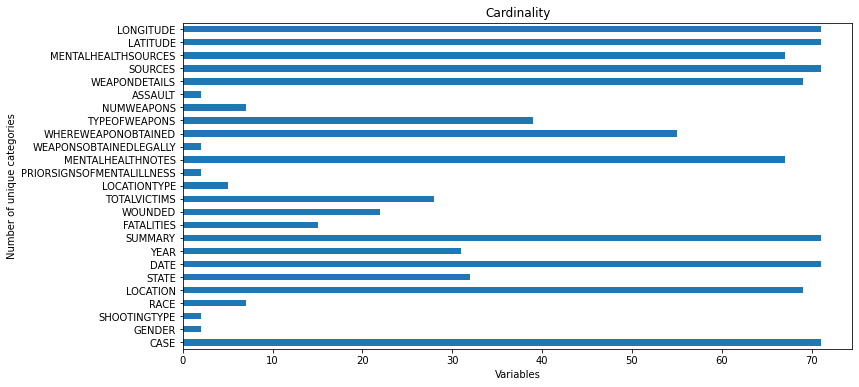

In [16]:
# plot the cardinality:

us_mass_shooting.nunique().plot.barh(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [8]:
# check info. - statistics of a dataset
us_mass_shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CASE                       71 non-null     object 
 1   GENDER                     71 non-null     object 
 2   SHOOTINGTYPE               71 non-null     object 
 3   RACE                       71 non-null     object 
 4   LOCATION                   71 non-null     object 
 5   STATE                      71 non-null     object 
 6   DATE                       71 non-null     object 
 7   YEAR                       71 non-null     int64  
 8   SUMMARY                    71 non-null     object 
 9   FATALITIES                 71 non-null     int64  
 10  WOUNDED                    71 non-null     int64  
 11  TOTALVICTIMS               71 non-null     int64  
 12  LOCATIONTYPE               71 non-null     object 
 13  PRIORSIGNSOFMENTALILLNESS  71 non-null     object 
 

In [9]:
# check datatypes
us_mass_shooting.dtypes

CASE                          object
GENDER                        object
SHOOTINGTYPE                  object
RACE                          object
LOCATION                      object
STATE                         object
DATE                          object
YEAR                           int64
SUMMARY                       object
FATALITIES                     int64
WOUNDED                        int64
TOTALVICTIMS                   int64
LOCATIONTYPE                  object
PRIORSIGNSOFMENTALILLNESS     object
MENTALHEALTHNOTES             object
WEAPONSOBTAINEDLEGALLY        object
WHEREWEAPONOBTAINED           object
TYPEOFWEAPONS                 object
NUMWEAPONS                     int64
ASSAULT                       object
WEAPONDETAILS                 object
SOURCES                       object
MENTALHEALTHSOURCES           object
LATITUDE                     float64
LONGITUDE                    float64
dtype: object

In [38]:
# Let's replace the empty strings with NaN values
us_mass_shooting = us_mass_shooting.replace(' ', np.nan)
# Let's replace the question marks (?) with NaN values
us_mass_shooting = us_mass_shooting.replace('?', np.nan)
# Let's replace the question marks (.) with NaN values
us_mass_shooting = us_mass_shooting.replace('.', np.nan)

In [17]:
# display categorical features/columns -> 

categorical_columns = us_mass_shooting.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['CASE', 'GENDER', 'SHOOTINGTYPE', 'RACE', 'LOCATION', 'STATE', 'DATE',
       'SUMMARY', 'LOCATIONTYPE', 'PRIORSIGNSOFMENTALILLNESS',
       'MENTALHEALTHNOTES', 'WEAPONSOBTAINEDLEGALLY', 'WHEREWEAPONOBTAINED',
       'TYPEOFWEAPONS', 'ASSAULT', 'WEAPONDETAILS', 'SOURCES',
       'MENTALHEALTHSOURCES'],
      dtype='object')

In [18]:
# display numerical features/columns -> 

numerical_columns = us_mass_shooting.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['YEAR', 'FATALITIES', 'WOUNDED', 'TOTALVICTIMS', 'NUMWEAPONS',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [10]:
# check count
us_mass_shooting.count()

CASE                         71
GENDER                       71
SHOOTINGTYPE                 71
RACE                         71
LOCATION                     71
STATE                        71
DATE                         71
YEAR                         71
SUMMARY                      71
FATALITIES                   71
WOUNDED                      71
TOTALVICTIMS                 71
LOCATIONTYPE                 71
PRIORSIGNSOFMENTALILLNESS    71
MENTALHEALTHNOTES            67
WEAPONSOBTAINEDLEGALLY       69
WHEREWEAPONOBTAINED          71
TYPEOFWEAPONS                71
NUMWEAPONS                   71
ASSAULT                      71
WEAPONDETAILS                71
SOURCES                      71
MENTALHEALTHSOURCES          67
LATITUDE                     71
LONGITUDE                    71
dtype: int64

In [11]:
# more statistics such as mean
us_mass_shooting.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,71.0,2002.112676,9.337404,1982.000000,1993.500000,2005.000000,2011.000000,2015.000000
FATALITIES,71.0,8.042254,5.349063,4.000000,5.000000,6.000000,8.500000,33.000000
WOUNDED,71.0,7.225352,9.859292,0.000000,1.000000,3.000000,8.000000,58.000000
TOTALVICTIMS,71.0,15.267606,12.681773,5.000000,7.000000,11.000000,18.500000,70.000000
NUMWEAPONS,71.0,2.197183,1.508260,1.000000,1.000000,2.000000,3.000000,9.000000
LATITUDE,71.0,37.815320,6.074233,21.325512,33.745138,38.583385,41.915030,48.050823
LONGITUDE,71.0,-96.953730,18.837319,-157.847305,-117.750736,-90.668259,-81.149307,-71.072830


In [12]:
# check duplicates
us_mass_shooting.duplicated().sum()

0

In [13]:
# check missing values
us_mass_shooting.isna().sum()

CASE                         0
GENDER                       0
SHOOTINGTYPE                 0
RACE                         0
LOCATION                     0
STATE                        0
DATE                         0
YEAR                         0
SUMMARY                      0
FATALITIES                   0
WOUNDED                      0
TOTALVICTIMS                 0
LOCATIONTYPE                 0
PRIORSIGNSOFMENTALILLNESS    0
MENTALHEALTHNOTES            4
WEAPONSOBTAINEDLEGALLY       2
WHEREWEAPONOBTAINED          0
TYPEOFWEAPONS                0
NUMWEAPONS                   0
ASSAULT                      0
WEAPONDETAILS                0
SOURCES                      0
MENTALHEALTHSOURCES          4
LATITUDE                     0
LONGITUDE                    0
dtype: int64

In [19]:
# print names or check all columns which have null values -> 


[val for val in us_mass_shooting.columns if us_mass_shooting[val].isnull().sum() > 0]

['MENTALHEALTHNOTES', 'WEAPONSOBTAINEDLEGALLY', 'MENTALHEALTHSOURCES']

In [20]:
# print the percentage of missing values -> 

mask = us_mass_shooting.isnull()

total = mask.sum()

percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',keys=['count_missing', 'percentage_missing (%)'])

missing_data.sort_values(by='percentage_missing (%)', ascending=False,inplace=True)

missing_data

,count_missing,percentage_missing (%)
MENTALHEALTHSOURCES,4,5.633803
MENTALHEALTHNOTES,4,5.633803
WEAPONSOBTAINEDLEGALLY,2,2.816901
CASE,0,0.000000
PRIORSIGNSOFMENTALILLNESS,0,0.000000
LATITUDE,0,0.000000
SOURCES,0,0.000000
WEAPONDETAILS,0,0.000000
ASSAULT,0,0.000000
NUMWEAPONS,0,0.000000


In [21]:
# print the nullable columns -> 

nullable_columns = us_mass_shooting.columns[mask.any()].tolist()

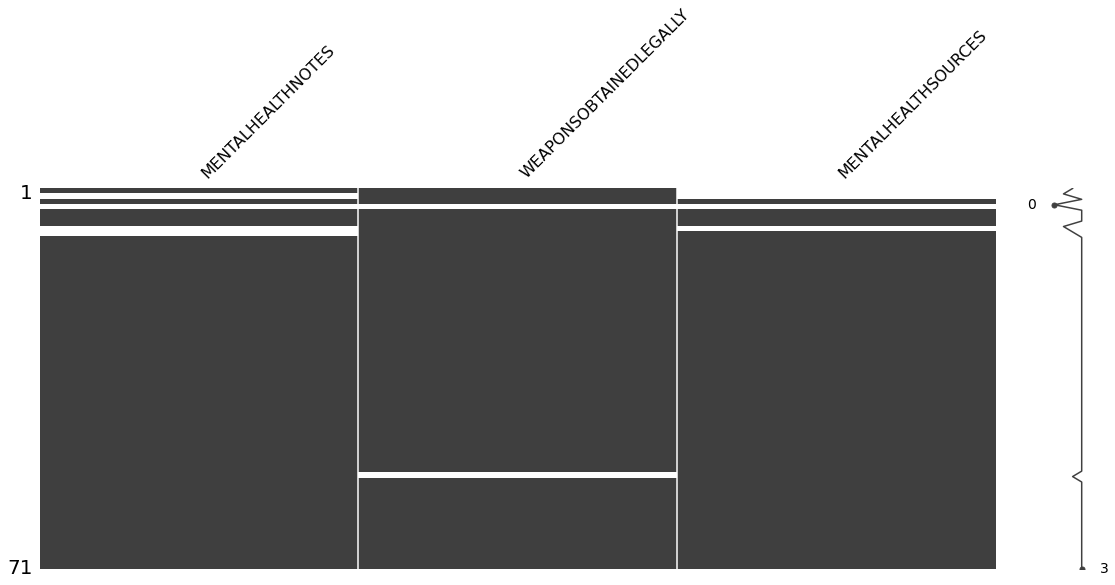

In [24]:
# use `missingno` libraries to plot the matrix and heatmap of nullable columns

msno.matrix(us_mass_shooting[nullable_columns],  figsize=(19,7))

plt.show()

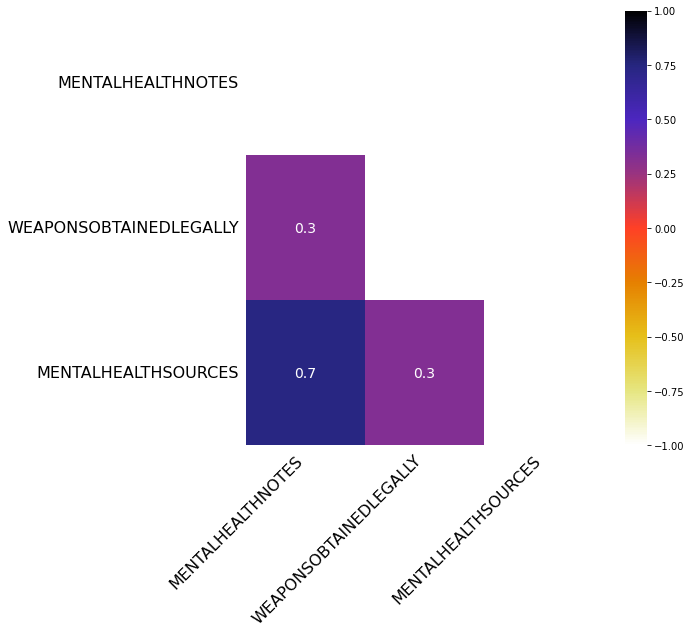

In [28]:
msno.heatmap(us_mass_shooting[nullable_columns], figsize=(8,8), cmap='CMRmap_r')
plt.show()

<AxesSubplot:>

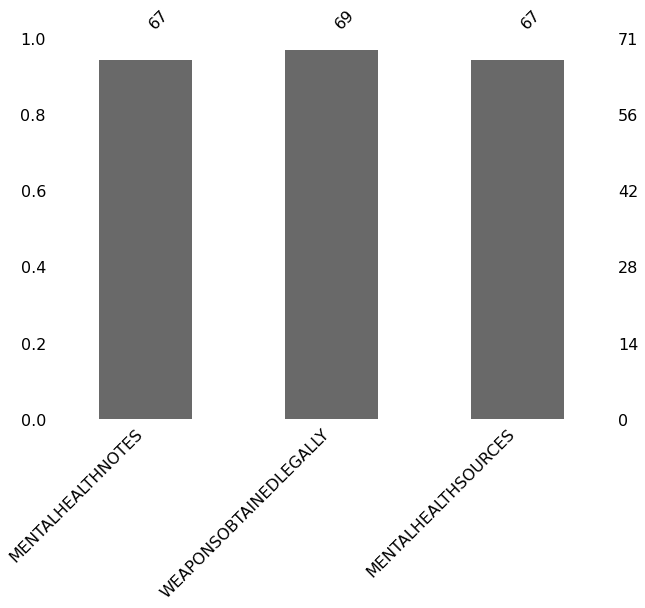

In [30]:
msno.bar(us_mass_shooting[nullable_columns], figsize=(10,7))

In [31]:
# dealing with missing values
us_mass_shooting['MENTALHEALTHSOURCES'].fillna(us_mass_shooting['MENTALHEALTHSOURCES'].mode()[0], inplace=True)
us_mass_shooting['MENTALHEALTHNOTES'].fillna(us_mass_shooting['MENTALHEALTHNOTES'].mode()[0], inplace=True)
us_mass_shooting['WEAPONSOBTAINEDLEGALLY'].fillna(us_mass_shooting['WEAPONSOBTAINEDLEGALLY'].mode()[0], inplace=True)

In [33]:
# confirm null values have been taken care of
us_mass_shooting.isna().sum().sum()

0

=========

In [34]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE
34,Red Lake massacre,Male,Spree,Native American,"Red Lake, Minnesota",Minnesota,3/21/2005,2005,"Jeffrey Weise, 16, murdered his grandfather, w...",10,...,No,Glock and Remington stolen from grandfather,"Two semiautomatic handguns, one shotgun",3,No,".40-caliber Glock 23, .22-caliber Ruger semiau...",http://news.google.com/newspapers?id=c4dIAAAAI...,http://www.cbsnews.com/stories/2005/03/24/nati...,47.876347,-95.016937


In [35]:
us_mass_shooting.LATITUDE.nunique()

71

In [37]:
us_mass_shooting.drop(
    columns=['LATITUDE', 'LONGITUDE'], inplace=True
)

In [39]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
15,Su Jung Health Sauna shooting,Male,Mass,Asian,"Norcross, Georgia",Georgia,2/22/2012,2012,"Jeong Soo Paek, 59, returned to a Korean spa f...",5,...,Yes,His sister worried about his homicidal tendenc...,Yes,Unknown,One semiautomatic handgun,1,No,.45-caliber semiautomatic handgun,http://www.gwinnettdailypost.com/news/2012/feb...,http://www.gwinnettdailypost.com/news/2012/feb...


========

In [40]:
us_mass_shooting.GENDER.nunique()

2

In [41]:
us_mass_shooting.GENDER.unique()

array(['Male', 'Female'], dtype=object)

In [45]:
us_mass = us_mass_shooting.GENDER.value_counts().reset_index()
us_mass.rename(columns={'index':'GENDER', 'GENDER':'Count of victims per Gender'}, inplace=True)
us_mass

,GENDER,Count of victims per Gender
0,Male,69
1,Female,2


In [72]:
fig = px.bar(us_mass_shooting.GENDER.value_counts(), color=['Male', 'Female'], title='Victims of Mass Shooting Per Gender',
            template='presentation')
fig

In [63]:
fig = px.pie(values= us_mass_shooting.GENDER.value_counts(), names=['Male','Female'], 
            title='Victims of Mass Shooting Per Gender',
            template='presentation',
            color_discrete_sequence=['#891336','#009277'],
            data_frame=us_mass_shooting)
fig

======================

In [73]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
21,Fort Hood massacre,Male,Mass,Other,"Fort Hood, Texas",Texas,11/5/2009,2009,"Army psychiatrist Nidal Malik Hasan, 39, opene...",13,...,Yes,Medical officials at Walter Reed Army Medical ...,Yes,"Guns Galore in Kileen, Texas",One semiautomatic handgun,1,No,FN Five-seven semiautomatic handgun,http://seattletimes.com/html/nationworld/20102...,http://www.npr.org/templates/story/story.php?s...


In [75]:
us_mass_shooting.SHOOTINGTYPE.nunique()

2

In [76]:
us_mass_shooting.SHOOTINGTYPE.unique()

array(['Mass', 'Spree'], dtype=object)

In [84]:
shooting_type = us_mass_shooting.SHOOTINGTYPE.value_counts().reset_index()
shooting_type.rename(columns={'index':'SHOOTINGTYPE', 'SHOOTINGTYPE':'Count of Victims per Shooting Type'}, inplace=True)
shooting_type

,SHOOTINGTYPE,Count of Victims per Shooting Type
0,Mass,63
1,Spree,8


In [80]:
fig = px.bar(us_mass_shooting.SHOOTINGTYPE.value_counts(), color=['Mass', 'Spree'], title='Shooting Types',template='presentation')
fig

In [83]:
fig = px.pie(values= us_mass_shooting.SHOOTINGTYPE.value_counts(), names=['Mass','Spree'], 
            title='Shooting Types',
            template='presentation',
            color_discrete_sequence=['#809936','#123777'],
            data_frame=us_mass_shooting)
fig

============

In [85]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
40,Hotel shooting,Male,Mass,Latino,"Tampa, Florida",Florida,12/30/1999,1999,"Hotel employee Silvio Leyva, 36, gunned down f...",5,...,Yes,"His brother called him ""unbalanced"" and mental...",Yes,"One purchased from Big E's in Tampa, Fla.","One semiautomatic handgun, one revolver",2,No,9mm Lorcin semiautomatic handgun; .38-caliber ...,http://www.sptimes.com/News/123000/news_pf/Tam...,http://www.sptimes.com/News/123000/news_pf/Tam...


In [86]:
us_mass_shooting.RACE.nunique()

7

In [87]:
us_mass_shooting.RACE.unique()

array(['Middle Eastern', 'White', 'Native American', 'Black', 'Latino',
       'Asian', 'Other'], dtype=object)

In [92]:
us_mass_race = us_mass_shooting.RACE.value_counts().reset_index()
us_mass_race.rename(columns={'index':'RACE', 'RACE':'Count of Victims per Race'}, inplace=True)
us_mass_race

,RACE,Count of Victims per Race
0,White,45
1,Black,11
2,Asian,6
3,Latino,4
4,Native American,3
5,Middle Eastern,1
6,Other,1


In [100]:
fig = px.bar(us_mass_shooting.RACE.value_counts(), color={'White':'red', 'Black':'yellow', 'Asian':'green', 
                                                                    'Latino':'#004332', 'Native American':'#546332', 'Middle Eastern':'#722190',
                                                                    'Other':'#477000'}, title='Race')
fig

In [107]:
fig = px.pie(values= us_mass_shooting.RACE.value_counts(), names=['White','Black', 'Asian', 'Latino', 'Native American', 'Middle Eastern', 'Other'], 
            title='RACE',
            color_discrete_sequence=['#560390','yellow', 'green', '#004332', '#000144', '#090090','#477000'],
            data_frame=us_mass_shooting)
fig

===============

In [109]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,...,No,"Fryberg was well-liked and allegedly happy, bu...",No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...


In [111]:
us_mass_shooting.STATE.nunique()

32

In [112]:
us_mass_shooting.STATE.unique()

array(['Tennessee', 'South Carolina', 'Washington', 'California', 'D.C.',
       'Florida', 'New York', 'Connecticut', 'Minnesota', 'Wisconsin',
       'Colorado', 'Georgia', 'Nevada', 'Arizona', 'Texas',
       'North Carolina', 'Kentucky', 'Illinois', 'Missouri', 'Nebraska',
       'Virginia', 'Utah', 'Pennsylvania', 'Ohio', 'Mississippi',
       'Massachusetts', 'Hawaii', 'Oregon', 'Arkansas', 'Michigan',
       'Iowa', 'Oklahoma'], dtype=object)

In [116]:
us_mass_state = us_mass_shooting.STATE.value_counts().reset_index()
us_mass_state.rename(columns={'index':'STATE', 'STATE':'Count of Victims Per State'}, inplace=True)
us_mass_state

,STATE,Count of Victims Per State
0,California,11
1,Washington,6
2,Florida,6
3,Texas,5
4,New York,4
5,Connecticut,3
6,Wisconsin,3
7,Colorado,3
8,Kentucky,2
9,Illinois,2


In [118]:
fig = px.bar(us_mass_shooting.STATE.value_counts(), color=['Tennessee', 'South Carolina', 'Washington', 'California', 'D.C.',
    'Florida', 'New York', 'Connecticut', 'Minnesota', 'Wisconsin',
    'Colorado', 'Georgia', 'Nevada', 'Arizona', 'Texas',
    'North Carolina', 'Kentucky', 'Illinois', 'Missouri', 'Nebraska',
    'Virginia', 'Utah', 'Pennsylvania', 'Ohio', 'Mississippi',
    'Massachusetts', 'Hawaii', 'Oregon', 'Arkansas', 'Michigan',
    'Iowa', 'Oklahoma'], title='Count of Victims per State')
fig

In [124]:
fig = px.pie(values=us_mass_shooting.STATE.value_counts(), names=[
    'Tennessee', 'South Carolina', 'Washington', 'California', 'D.C.',
    'Florida', 'New York', 'Connecticut', 'Minnesota', 'Wisconsin',
    'Colorado', 'Georgia', 'Nevada', 'Arizona', 'Texas',
    'North Carolina', 'Kentucky', 'Illinois', 'Missouri', 'Nebraska',
    'Virginia', 'Utah', 'Pennsylvania', 'Ohio', 'Mississippi',
    'Massachusetts', 'Hawaii', 'Oregon', 'Arkansas', 'Michigan',
    'Iowa', 'Oklahoma'
    ], color_discrete_sequence=['#560390','yellow', 'green', '#004332', '#000144', '#090090','#477000', '#000077', '#898000', '#755123',
                                    '#000000','#999933', '#129955', '#345666', '#660777', 'indigo','violet', 'red', '#901100', '#790323',
                                    '#222999','#438111', '#707070', '#004332', '#099933', '#474712','#166590', '#233478', '#898989', '#777977',
                                    '#317888','#872907'
                                    ], title='Count of Victims per State', data_frame=us_mass_shooting)
fig

==============

In [125]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
44,Columbine High School massacre,Male,Mass,White,"Littleton, Colorado",Colorado,4/20/1999,1999,"Eric Harris, 18, and Dylan Klebold, 17, opened...",15,...,Yes,Harris was an alleged psychopath; Klebold was ...,No,Purchased variously at Tanner Gun Show in Denv...,"One semiautomatic handgun (assault), one rifle...",4,Yes,9mm Intratec DC-9 semiautomatic handgun; 9mm H...,http://www.usatoday.com/news/nation/2009-04-13...,http://www.slate.com/articles/news_and_politic...


In [129]:
us_mass_shooting.YEAR.nunique()

31

In [130]:
us_mass_shooting.YEAR.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 1986, 1984, 1982], dtype=int64)

In [134]:
year = us_mass_shooting.YEAR.value_counts().reset_index()
year.rename(columns={'index':'Year', 'YEAR':'Count of Victims per Year'}, inplace=True)
year

,Year,Count of Victims per Year
0,2012,7
1,1999,5
2,2013,5
3,2009,4
4,2007,4
5,1993,4
6,1998,3
7,2011,3
8,2008,3
9,2006,3


In [136]:
fig = px.bar(us_mass_shooting.YEAR.value_counts(), color=['2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
    '2004', '2003', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993',
    '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1984', '1982'], title='Count of Victims per Year')
fig

In [138]:
fig = px.pie(values= us_mass_shooting.YEAR.value_counts(), names=['2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
    '2004', '2003', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993',
    '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1984', '1982'], 
            title='Count of Victims per Year',
            color_discrete_sequence=['red','yellow', 'green', '#004332', '#000144', '#090090','#477000', '#000077', '#898000', '#755123',
                                    '#000000','#999933', '#129955', '#345666', '#660777', 'indigo','violet', '#560390', '#901100', '#790323',
                                    '#222999','#438111', '#707070', '#004332', '#099933', '#474712','#166590', '#233478', '#898989', '#777977',
                                    '#317888',],
            data_frame=us_mass_shooting)
fig

================

In [139]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
34,Red Lake massacre,Male,Spree,Native American,"Red Lake, Minnesota",Minnesota,3/21/2005,2005,"Jeffrey Weise, 16, murdered his grandfather, w...",10,...,Yes,He voluntarily visited a a psychiatric ward. H...,No,Glock and Remington stolen from grandfather,"Two semiautomatic handguns, one shotgun",3,No,".40-caliber Glock 23, .22-caliber Ruger semiau...",http://news.google.com/newspapers?id=c4dIAAAAI...,http://www.cbsnews.com/stories/2005/03/24/nati...


In [143]:
us_mass_summary = us_mass_shooting.SUMMARY.unique()

======

In [144]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
27,Westroads Mall shooting,Male,Mass,White,"Omaha, Nebraska",Nebraska,12/5/2007,2007,"Robert A. Hawkins, 19, opened fire inside West...",9,...,Yes,He had been treated in the past for depression...,No,Stolen from grandfather,One rifle (assault),1,Yes,WASR-10 Century Arms semiautomatic rifle,http://www.guardian.co.uk/world/2007/dec/06/us...,http://www.guardian.co.uk/world/2007/dec/06/us...


In [147]:
us_mass_mentalsources = us_mass_shooting.MENTALHEALTHSOURCES.unique()

============

In [148]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
49,R.E. Phelon Company shooting,Male,Mass,Black,"Aiken, South Carolina",South Carolina,9/15/1997,1997,"Ex-con Hastings Arthur Wise, 43, opened fire a...",4,...,No,"An ex-con, he had been freed from prison, alth...",No,Unknown,One semiautomatic handgun,1,No,9mm semiautomatic handgun,http://www.vpc.org/studies/wgun970915.htm; htt...,http://chronicle.augusta.com/stories/1997/09/1...


In [151]:
us_mass_Information_Sources = us_mass_shooting.SOURCES.unique()

In [150]:
us_mass_shooting.SOURCES.nunique()

71

=============

In [152]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
17,IHOP shooting,Male,Mass,Latino,"Carson City, Nevada",Nevada,9/6/2011,2011,"Eduardo Sencion, 32, opened fire at an Interna...",5,...,Yes,He was diagnosed with paranoid schizophrenia a...,Yes,Purchased from an individual,"Two rifles (both assault), one revolver",3,Yes,"AK-47 Norinco Arms variant, AK-47 Romarm Cugir...",http://www.huffingtonpost.com/2011/11/03/eduar...,http://www.huffingtonpost.com/2011/11/03/eduar...


In [155]:
us_mass_weapons = us_mass_shooting.WEAPONDETAILS.unique()

==============

In [156]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
60,University of Iowa shooting,Male,Mass,Asian,"Iowa City, Iowa",Iowa,11/1/1991,1991,"Former graduate student Gang Lu, 28, went on a...",6,...,Yes,He was described as darkly disturbed and isola...,Yes,"Fin & Feather in Iowa City, Iowa",One revolver,1,No,.38-caliber Taurus revolver,http://www.nytimes.com/1991/11/03/us/gunman-in...,http://www.nytimes.com/1991/11/03/us/gunman-in...


In [157]:
us_mass_shooting.ASSAULT.nunique()

2

In [158]:
us_mass_shooting.ASSAULT.unique()

array(['Yes', 'No'], dtype=object)

In [164]:
us_mass_assault = us_mass_shooting.ASSAULT.value_counts().reset_index()
us_mass_assault.rename(columns={'index':'ASSAULT', 'ASSAULT':'Count of Assaulted Victims'}, inplace=True)
us_mass_assault

,ASSAULT,Count of Assaulted Victims
0,No,55
1,Yes,16


In [174]:
fig = px.bar(us_mass_shooting.ASSAULT.value_counts(), color=['No','Yes'], title='Assaulted Victims')
fig

In [170]:
fig = px.pie(values= us_mass_shooting.ASSAULT.value_counts(), names=['No', 'Yes'], 
            title='ASSAULT',
            color_discrete_sequence=['#560390', '#477000'],
            data_frame=us_mass_shooting)
fig

================

In [171]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
31,Amish school shooting,Male,Mass,White,"Lancaster County, Pennsylvania",Pennsylvania,10/2/2006,2006,"Charles Carl Roberts, 32, shot 10 young girls ...",6,...,No,He told his wife that he'd molested two young ...,Yes,"Local stores in Nickel Mines, Penn.","One semiautomatic handgun, one rifle, one shotgun",3,No,Springfield semiautomatic handgun; .30-06 Ruge...,http://news.google.com/newspapers?id=O8oyAAAAI...,http://www.cnn.com/2006/US/10/03/amish.shootin...


In [172]:
us_mass_shooting.NUMWEAPONS.nunique()

7

In [173]:
us_mass_shooting.NUMWEAPONS.unique()

array([3, 1, 2, 4, 5, 9, 7], dtype=int64)

In [179]:
us_mass_numweapons = us_mass_shooting.NUMWEAPONS.value_counts().reset_index()
us_mass_numweapons.rename(columns={'index':'NUMWEAPONS', 'NUMWEAPONS':' assaulted victims'})
us_mass_numweapons

,index,NUMWEAPONS
0,1,30
1,2,18
2,3,12
3,4,7
4,5,2
5,9,1
6,7,1


In [180]:
fig = px.bar(us_mass_shooting.NUMWEAPONS.value_counts(), color=[3, 1, 2, 4, 5, 9, 7], title='Number of Weapons')
fig

In [181]:
fig = px.pie(values= us_mass_shooting.NUMWEAPONS.value_counts(), names=[3, 1, 2, 4, 5, 9, 7], 
            title='Number of Weapons',
            color_discrete_sequence=['#000000','#999933', '#129955', '#345666', '#660777', 'indigo','violet'],
            data_frame=us_mass_shooting)
fig

===========

In [182]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
19,Hartford Beer Distributor shooting,Male,Mass,Black,"Manchester, Connecticut",Connecticut,8/3/2010,2010,"Omar S. Thornton, 34, shot up his Hartford Bee...",9,...,No,He apparently was driven over the edge by unad...,Yes,"Gun dealer in East Windsor, Conn.",Two semiautomatic handguns,2,No,Two 9mm Ruger SR9 semiautomatic handguns,http://www.cbsnews.com/8301-504083_162-2001255...,http://www.cbsnews.com/8301-504083_162-2001255...


In [187]:
us_mass_typesofweapons = us_mass_shooting.TYPEOFWEAPONS.unique()

======

In [189]:
us_mass_weaponsobtained = us_mass_shooting.WHEREWEAPONOBTAINED.nunique()

In [190]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
54,Long Island Rail Road massacre,Male,Mass,Black,"Garden City, New York",New York,12/7/1993,1993,"Colin Ferguson, 35, opened fire on an eastboun...",6,...,Yes,Psychiatrists and others said he suffered from...,Yes,"Turner's Outdoorsman in Signal Hill, Calif.",One semiautomatic handgun,1,No,9mm Ruger P89 semiautomatic handgun,http://www.nytimes.com/1993/12/12/nyregion/tor...,http://www.nytimes.com/1993/12/12/nyregion/tor...


In [191]:
us_mass_shooting.WEAPONSOBTAINEDLEGALLY.nunique()

2

In [192]:
us_mass_shooting.WEAPONSOBTAINEDLEGALLY.unique()

array(['Yes', 'No'], dtype=object)

In [196]:
weapons_obtained_legally = us_mass_shooting.WEAPONSOBTAINEDLEGALLY.value_counts().reset_index()
weapons_obtained_legally.rename(columns={'index':'weapons obtained legally', 'WEAPONSOBTAINEDLEGALLY':'Count of Weapons Obtained Legally'}, inplace=True)
weapons_obtained_legally

,weapons obtained legally,Count of Weapons Obtained Legally
0,Yes,58
1,No,13


In [201]:
fig = px.bar(us_mass_shooting.WEAPONSOBTAINEDLEGALLY.value_counts(), color=['Yes', 'No'], title='weapons obtained legally')
fig

In [203]:
fig = px.pie(values= us_mass_shooting.WEAPONSOBTAINEDLEGALLY.value_counts(), names=['Yes', 'No'], 
            title='weapons obtained legally',
            color_discrete_sequence=['#433987','#999933'],
            data_frame=us_mass_shooting)
fig

In [204]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
65,ESL shooting,Male,Mass,White,"Sunnyvale, California",California,2/16/1988,1988,Former ESL Incorporated employee Richard Farle...,7,...,Yes,He stalked and harassed his colleague Laura Bl...,Yes,Various sporting goods and gun stores in North...,"Two semiautomatic handguns, one rifle, two rev...",7,No,".380 ACP Browning, 9mm Smith & Wesson semiauto...",http://articles.latimes.com/1988-02-18/news/mn...,http://books.google.com/books?id=JiQUkwBnzgYC&...


In [209]:
us_mass_shooting_mentalNotes = us_mass_shooting.MENTALHEALTHNOTES.unique()

===========

In [210]:
us_mass_shooting.PRIORSIGNSOFMENTALILLNESS.nunique()

2

In [211]:
us_mass_shooting.PRIORSIGNSOFMENTALILLNESS.unique()

array(['Yes', 'No'], dtype=object)

In [218]:
prior_signs = us_mass_shooting.PRIORSIGNSOFMENTALILLNESS.value_counts().reset_index()
prior_signs.rename(columns={'index':'Prior Signs of Mental Illness', 'PRIORSIGNSOFMENTALILLNESS':'Count of how many people showed Prior Signs of Mental Illness'}, inplace=True)
prior_signs

,Prior Signs of Mental Illness,Count of how many people showed Prior Signs of Mental Illness
0,Yes,49
1,No,22


In [219]:
fig = px.bar(us_mass_shooting.PRIORSIGNSOFMENTALILLNESS.value_counts(), color=['Yes', 'No'], title='weapons obtained legally')
fig

In [220]:
fig = px.pie(values= us_mass_shooting.PRIORSIGNSOFMENTALILLNESS.value_counts(), names=['Yes', 'No'], 
            title='Prior Signs of Mental Illness',
            color_discrete_sequence=['#974360','#273077'],
            data_frame=us_mass_shooting)
fig

===========

In [221]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
53,Chuck E. Cheese's killings,Male,Mass,Black,"Aurora, Colorado",Colorado,12/14/1993,1993,"Nathan Dunlap, 19, a recently fired Chuck E. C...",4,...,No,"While he was in prison awaiting trial, he star...",Yes,Unknown,One semiautomatic handgun,1,No,.25-caliber semiautomatic handgun,http://www.denverpost.com/news/ci_20218952/aur...,http://www.5280.com/magazine/2008/12/politics-...


=====

In [222]:
us_mass_shooting.LOCATIONTYPE.nunique()

5

In [223]:
us_mass_shooting.LOCATIONTYPE.unique()

array(['Military', 'Religious', 'School', 'Other', 'Workplace'],
      dtype=object)

In [230]:
us_mass_location = us_mass_shooting.LOCATIONTYPE.value_counts().reset_index()
us_mass_location.rename(columns={'index':'Location Type', 'LOCATIONTYPE':'Count of Victims per Location'}, inplace=True)
us_mass_location

,Location Type,Count of Victims per Location
0,Other,30
1,Workplace,20
2,School,13
3,Military,4
4,Religious,4


In [231]:
fig = px.bar(us_mass_shooting.LOCATIONTYPE.value_counts(), color=['Military', 'Religious', 'School', 'Other', 'Workplace'], title='Location where the Victim was Shot')
fig

In [236]:
fig = px.pie(values= us_mass_shooting.LOCATIONTYPE.value_counts(), names=['Military', 'Religious', 'School', 'Other', 'Workplace'], 
            title='Location where the Victim was Shot',hole=0.6,
            color_discrete_sequence=['#974360','#273077','#129955', '#345666', '#660777'],
            data_frame=us_mass_shooting)
fig

==============

In [241]:
case = us_mass_shooting.CASE.unique()

==========

In [237]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
67,United States Postal Service shooting,Male,Mass,White,"Edmond, Oklahoma",Oklahoma,8/20/1986,1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,...,Yes,He was worried he had inherited mental problem...,Yes,"Issued by Oklahoma National Guard, where Sherr...",Three semiautomatic handguns,3,No,".22-caliber, two .45-caliber Colt Model 1911-A...",http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...


In [249]:
us_mass_gender_fatalities = us_mass_shooting.groupby('GENDER')[['FATALITIES']].sum().sort_values('FATALITIES', ascending=False).reset_index()
us_mass_gender_fatalities

,GENDER,FATALITIES
0,Male,559
1,Female,12


In [257]:
px.bar(us_mass_shooting.groupby('GENDER')[['FATALITIES']].sum(), color=['blue','red'])

In [266]:
prior_signs_shooting_type = us_mass_shooting.groupby('SHOOTINGTYPE')['PRIORSIGNSOFMENTALILLNESS'].size().reset_index()
prior_signs_shooting_type

,SHOOTINGTYPE,PRIORSIGNSOFMENTALILLNESS
0,Mass,63
1,Spree,8


In [271]:
px.bar(us_mass_shooting.groupby('SHOOTINGTYPE')['PRIORSIGNSOFMENTALILLNESS'].size(), color=['blue','red'])

In [272]:
us_mass_shooting.sample(n=1)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES
58,Lindhurst High School shooting,Male,Mass,White,"Olivehurst, California",California,5/1/1992,1992,Former Lindhurst High School student Eric Hous...,4,...,No,He suffered violent physical abuse as a child....,Yes,Local gun retailer,"One rifle, one shotgun",2,No,.22-caliber sawed-off rifle; 12-gauge pump-act...,http://www.schoolshooters.info/PL/Subject-Hous...,http://www.schoolshooters.info/PL/Subject-Hous...
